# **Assignment: K-Means Clustering for Customer Segmentation**

## **Objective**  
Perform **K-Means clustering** to segment customers into different groups based on their annual income and spending score. The goal is to identify patterns in customer data and group them accordingly.

---

## **Dataset**  
Download the **Mall Customers dataset** from Kaggle:  
🔗 [Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)  

- Load the **Mall_Customers.csv** dataset into a Pandas DataFrame and display the first few rows to understand the structure.
- The **"Annual Income (k$)"** and **"Spending Score (1-100)"** columns will be used as features for clustering.
- The **"Gender"** column can be ignored for clustering, as we are not using it for the current task.

---

## **Feature Description**  
- **Target Feature:** None (Unsupervised learning task)  
- **Features for Clustering:**  
  - **Annual Income (k$)** (Annual income in thousands of dollars)
  - **Spending Score (1-100)** (A score given based on the customer's spending behavior)

---

## **Tasks**  

### **1. Data Preprocessing**  
- Load the **Mall Customers dataset** and check for missing values.  
- Standardize the features **Annual Income** and **Spending Score** using **StandardScaler** (this is important for K-Means).

---

### **2. Perform K-Means Clustering**  
- Apply **K-Means clustering** with different values of `k` (the number of clusters). Start by setting `k = 5`.
- Visualize the clusters on a 2D plot using **Matplotlib** or **Seaborn**.  
- Use the **Elbow Method** to determine the optimal number of clusters by plotting the **Within-cluster Sum of Squares (WCSS)** for different values of `k`.

---

### **3. Hyperparameter Tuning**  
- Perform the **Elbow Method** to find the optimal value of `k` (number of clusters).  
- Try different values of `k` (e.g., 3, 4, 6, etc.) and evaluate the cluster formation.

---

### **4. Model Evaluation**  
- After determining the optimal number of clusters, label the dataset with cluster assignments and examine the resulting clusters.
- Plot a **scatter plot** to visualize the clusters and their centroids (for two features: **Annual Income** vs. **Spending Score**).
- Compare the cluster centers (centroids) for different `k` values.

---


## **Submission Guidelines**  
- Submit a **Colab Notebook (.ipynb)** with code and visualizations.  


In [3]:
import pandas as pd
customer_data = pd.read_csv('/content/drive/MyDrive/Data Science./Class 15 (18 April) (Assignments Solutions)/Solution/K-Means Clustering/Mall_Customers.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
features = customer_data[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [9]:
lables = kmeans.labels_

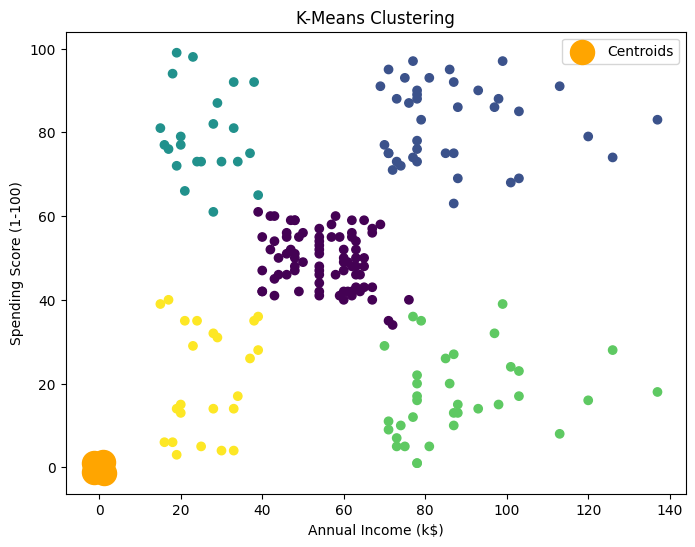

In [17]:
import matplotlib.pyplot as plt

plt.figure (figsize=(8,6))
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=lables, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='Orange', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [18]:
wcss =[]

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  wcss.append(kmeans.inertia_)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

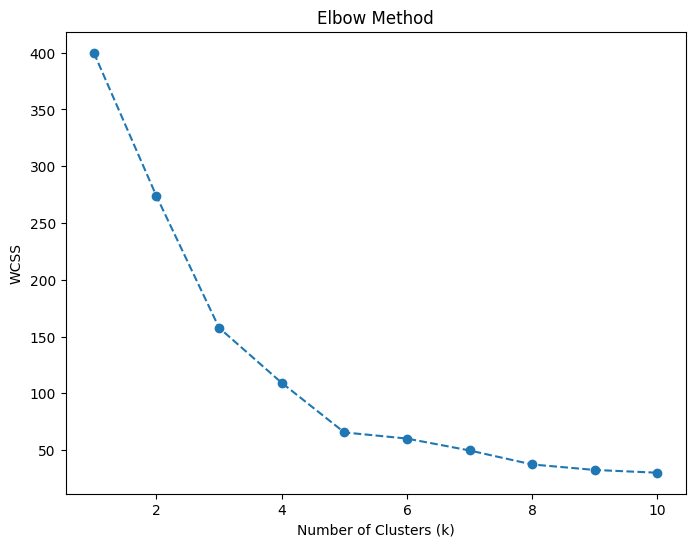

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt